# Logistic Regression Classification
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Setup

### Environment

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

### Load the dataset iris

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = df[df['Species'] != 0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  100 non-null    float64
 1   Sepal width   100 non-null    float64
 2   Petal length  100 non-null    float64
 3   Petal width   100 non-null    float64
 4   Species       100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


### A simple visualization

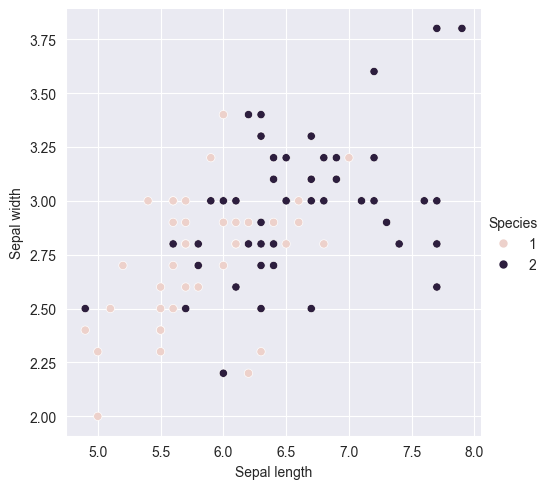

In [6]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:2]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
X_train[:5]

,Sepal length,Sepal width
114,5.8,2.8
92,5.8,2.6
147,6.5,3.0
139,6.9,3.1
142,5.8,2.7


## Train the model

In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression().fit(X, y)
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (report)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Confusion Matrix:
[[6 2]
 [5 7]]
Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.75      0.63         8
           2       0.78      0.58      0.67        12

    accuracy                           0.65        20
   macro avg       0.66      0.67      0.65        20
weighted avg       0.68      0.65      0.65        20

Accuracy: 0.65
